In [1]:
pip install CompactObject-TOV

# import all the packages used here

In [17]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3,dyn_cm_2,km,Msun,MeV,fm
#from TOVsolver.maximum_central_density import maximum_central_density

In [21]:
Tolos_crust_out=np.loadtxt("Tolos_crust_out.txt")
eps_crust_T_out=Tolos_crust_out[:,3] * g_cm_3
pres_crust_T_out=Tolos_crust_out[:,4] * dyn_cm_2
eps_com,pres_com=crust.PolyInterpolate(eps_crust_T_out,pres_crust_T_out)

In [37]:
print(eps_crust_T_out)

[2.94096142e-11 2.98486062e-10 2.98086978e-09 2.34142376e-08
 2.98229508e-08 1.18753040e-07 3.75594724e-07 7.48823452e-07
 7.75932634e-07 8.41154304e-07 1.49644965e-06 2.37203917e-06
 3.76022314e-06 4.02846436e-06 4.36683028e-06 4.73455735e-06
 5.96002921e-06 7.50391281e-06 8.80293008e-06 9.45001571e-06
 1.49804599e-05 2.37511782e-05 3.21689926e-05 3.59602872e-05
 4.74196891e-05 5.97114654e-05 7.87392036e-05 9.04152509e-05
 1.19234791e-04 1.50149521e-04 1.80354452e-04 1.98008202e-04
 2.79230276e-04 2.99882855e-04 3.62339446e-04 4.00081356e-04
 5.21630833e-04 5.72029396e-04 6.72284910e-04 7.45801819e-04
 8.08543469e-04 9.72395812e-04 1.15608831e-03 1.24630972e-03]


In [23]:
m_sig = 495.0/197.33
m_w = 3.96544
m_rho = 3.86662

g_sigma = math.sqrt(107.5751)
g_omega = math.sqrt(182.3949)
g_rho = math.sqrt(206.4260)

kappa = 3.091114168/197.33
lambda_0 = -0.00168015405
zeta = 0.024
Lambda_w = 0.045
theta = np.array([m_sig,m_w,m_rho,g_sigma,g_omega,g_rho,kappa,lambda_0,zeta,Lambda_w])
eps,pres = RMF.compute_EOS(eps_com,pres_com,theta)

In [25]:
eps_total = np.array([*eps_com,*eps])
pres_total = np.array([*pres_com,*pres])

In [31]:
print(eps_total)

[2.94096142e-11 2.98486062e-10 2.98086978e-09 ... 5.59845849e+00
 5.65838151e+00 5.71848833e+00]


In [39]:
# Stack them as two columns
data = np.column_stack((eps_total/g_cm_3, pres_total/dyn_cm_2))

In [57]:
data

array([[1.03170000e+04, 9.53930000e+18],
       [1.04710000e+05, 5.33790000e+20],
       [1.04570000e+06, 2.32410000e+22],
       ...,
       [1.96395967e+15, 5.17156885e+35],
       [1.98498089e+15, 5.24706093e+35],
       [2.00606658e+15, 5.32279237e+35]])

In [41]:
# Save the data to a file named "total_eos.txt"
np.savetxt("total_eos_1.txt", data, header="Energy Density   Pressure", fmt="%.6e")

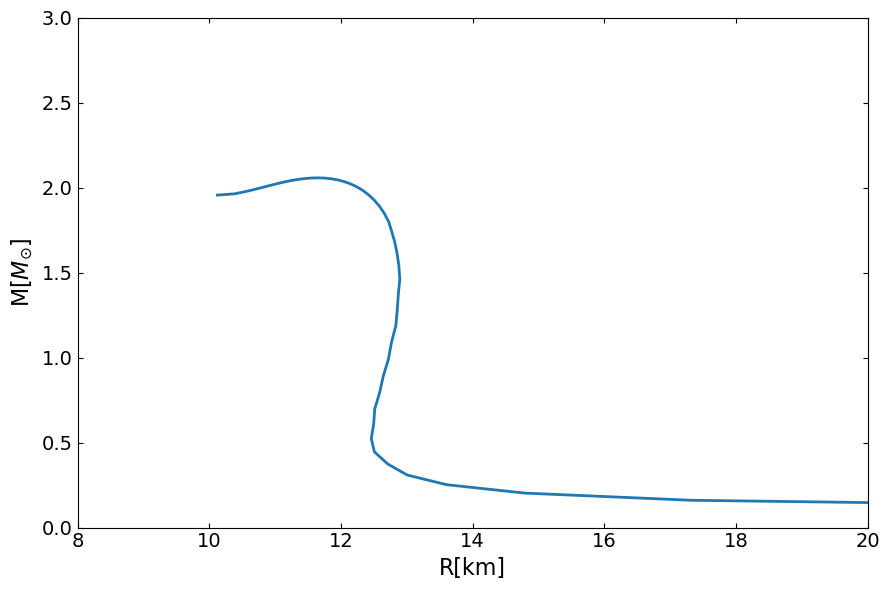

In [29]:
MR = main.OutputMR("",eps_total,pres_total).T

fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(MR[1]/km,MR[0]/Msun,lw=2)
ax.set_ylabel(r"M[$M_{\odot}$]", fontsize=16)
ax.set_xlabel("R[km]", fontsize=16)
ax.set_ylim(0,3)
ax.set_xlim(8.0,20.0)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
fig.tight_layout()
plt.show()


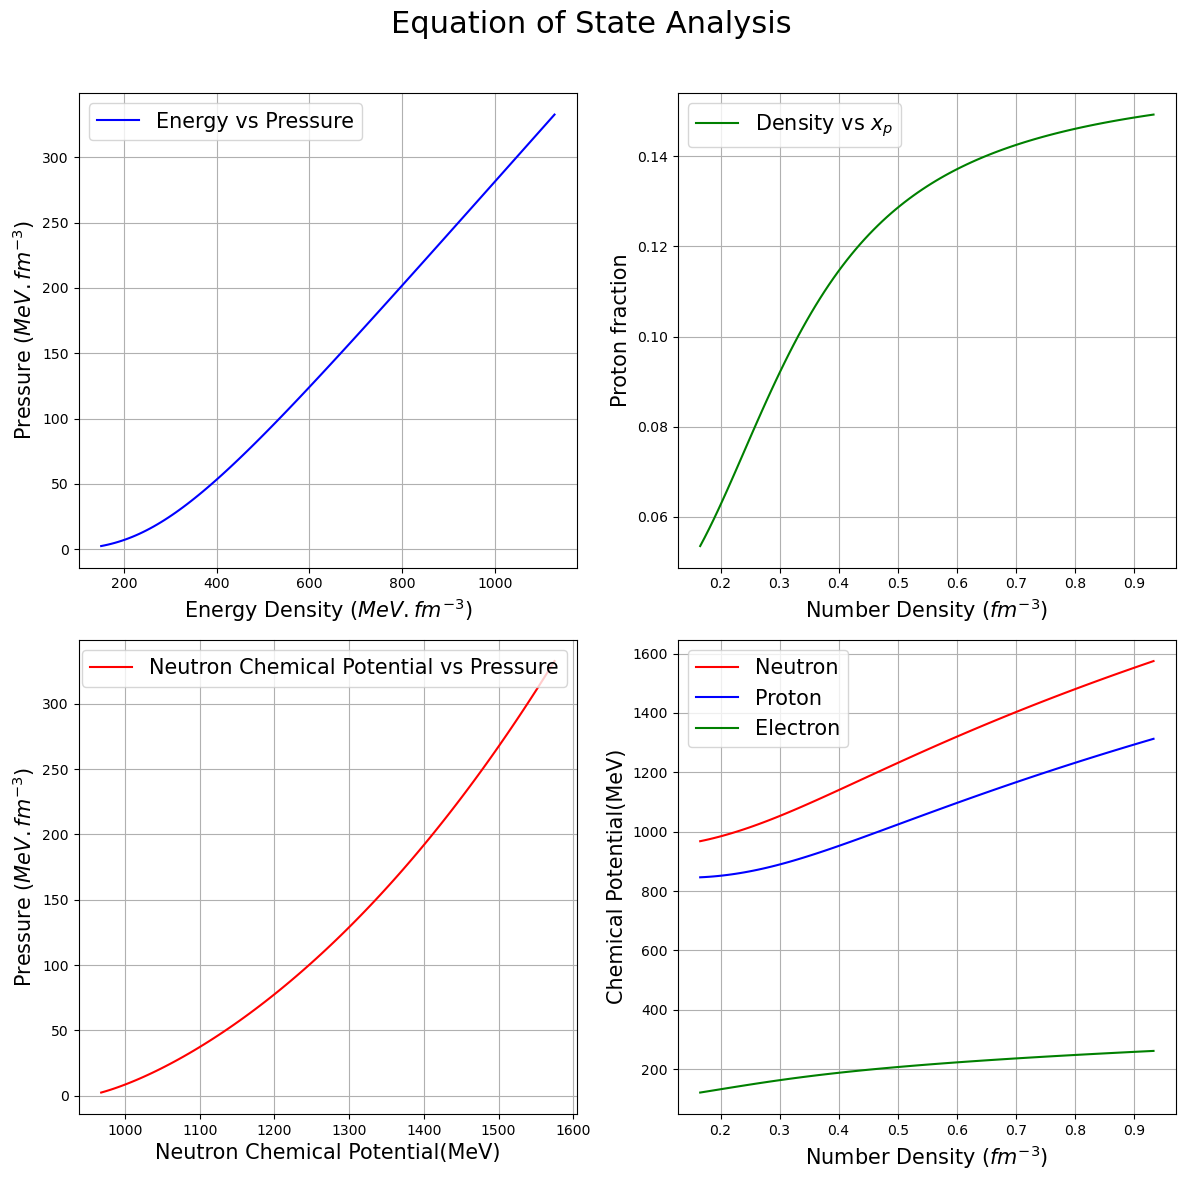

In [53]:
EoS_composition=RMF.compute_EOS(eps_com,pres_com,theta,return_tag=True)

rho=EoS_composition[0]
e=EoS_composition[1]/(MeV * fm**(-3))
p=EoS_composition[2]/(MeV*fm**(-3))

mu_p=EoS_composition[3]/MeV
mu_n=EoS_composition[4]/MeV
mu_e=EoS_composition[5]/MeV
mu_mu=EoS_composition[6]/MeV

xp=EoS_composition[7]

fig,axs=plt.subplots(2,2,figsize=(12,12))
fig.suptitle("Equation of State Analysis",fontsize=22)

axs[0,0].plot(e,p,color="blue",label="Energy vs Pressure")
axs[0,0].set_xlabel("Energy Density ($MeV.fm^{-3}$)",fontsize=15)
axs[0,0].set_ylabel("Pressure ($MeV.fm^{-3}$)",fontsize=15)
axs[0,0].legend(fontsize=15)
axs[0,0].grid(True)

axs[0,1].plot(rho,xp,color="green",label="Density vs $x_p$")
axs[0,1].set_xlabel("Number Density ($fm^{-3}$)",fontsize=15)
axs[0,1].set_ylabel("Proton fraction",fontsize=15)
axs[0,1].legend(fontsize=15)
axs[0,1].grid(True)

axs[1,0].plot(mu_n,p,color="red",label="Neutron Chemical Potential vs Pressure")
axs[1,0].set_xlabel("Neutron Chemical Potential(MeV)",fontsize=15)
axs[1,0].set_ylabel("Pressure ($MeV.fm^{-3}$)",fontsize=15)
axs[1,0].legend(fontsize=15)
axs[1,0].grid(True)

axs[1,1].plot(rho,mu_n,color="red",label="Neutron")
axs[1,1].plot(rho,mu_p,color="blue",label="Proton")
axs[1,1].plot(rho,mu_e,color="green",label="Electron")
axs[1,1].set_xlabel("Number Density ($fm^{-3}$)",fontsize=15)
axs[1,1].set_ylabel("Chemical Potential(MeV)",fontsize=15)
axs[1,1].legend(fontsize=15)
axs[1,1].grid(True)

plt.tight_layout(rect=[0,0,1,0.96])
#plt.tight_layout()
plt.show()